<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.883 · Aprendizaje por refuerzo</p>
<p style="margin: 0; text-align:right;">2022-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Indicar aquí el nombre y apellidos
</div>

# PEC 1 - Soluciones tabulares

En esta práctica implementaremos los diferentes métodos de aprendizaje por refuerzo vistos en las partes I y II del curso. En concreto, nos centraremos en la definición de un entorno e implementaremos los diferentes métodos para buscar una solución óptima del problema.

<u>Consideraciones generales</u>: 

- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## 0. El entorno __BlackJack__

El entorno __BlackJack__ simula una partida de blackjack, que se juega con una baraja francesa de 52 cartas (baraja de póker), constituída por 4 palos (trébol ♣, corazones ♥, picas ♠, y diamantes ♦) y 13 cartas por palo (As, los números del 2 al 10, J, Q y K).

El objetivo de este juego es obtener cartas cuyo valor numérico sumen el número
mayor posible sin exceder de 21.

Todas aquellas cartas con un valor numérico cuentan como dicho valor numérico,
las figuras (J, Q y K) cuentan como un 10, y el as puede contar como
un 1 (en este caso se denomina as no usable) o como un 11 (en este caso se denomina as usable).

En la siguiente figura puede observarse el valor numérico de todos los tipos de cartas:<br>

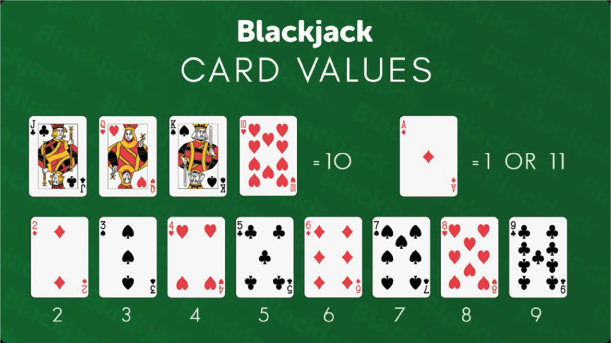

**Figura 1. El juego del Blackjack.** (Fuente: Sutton & Barto, 1998)

Las normas del juego están explicadas en el módulo 5 de la asignatura.

Jugar al blackjack puede ser formulado de forma natural como un MDP finito
y episódico

• Cada partida de blackjack es un episodio.<br>
• Las recompensas son: +1 por ganar, -1 por perder y 0 por empatar.<br>
• El retorno se calcula sin descuento (γ = 1).<br>
• El conjunto de acciones del jugador son pedir carta (hit) o plantarse (stick).
Es decir: A = {hit,stick}.<br>
• Los estados dependen de las cartas del jugador y de la carta que muestra el
crupier.<br>
• El jugador toma decisiones basándose en tres variables:<br>
– Si le ha salido un as que pueda contar como 11 sin pasarse (usable ace en
inglés).<br>
– La suma actual de sus cartas (de 12 a 21).<br>
– El valor de la carta boca arriba del crupier.<br>
• Esto hace un total de 200 estados distintos.<br>

El entorno que utilizaremos inicialmente implementa todas las características comentadas anteriormente y la siguiente política para el crupier:


• Se planta si su suma es 17 o mayor, pide carta en otro caso.


El código para implementar este entorno se encuentra disponible en el fichero adjunto `blackjack_env.py`

Vamos a empezar cargando el entorno y ver qué características tiene, ejecutando un episodio de prueba.

### 0.1. Carga de datos
El siguiente código carga los paquetes necesarios para ejecutar el ejemplo, crea el entorno mediante la instanciación de un objeto de la clase `BlackjackEnv` (importada del archivo adjunto `blackjack_env.py`) e imprime por pantalla la dimensión del espacio de acciones (0=plantarse, 1=pedir carta), del espacio de observaciones (una tupla de 3 elementos: la suma actual del jugador, la carta que muestra el crupier con valores 1-10, donde 1 es un as, y si el jugador tiene o no un as utilizable) y el rango de la variable de recompensa (cuyo valor es -1, 0 o 1 dependiendo de si el jugador pierde, empata o gana la partida y que por tanto va de menos infinito a más infinito).

In [ ]:
#Ejecutar esta celda sólo si ejecutamos este notebook en Google Colab desde Drive
from google.colab import drive
drive.mount('/content/drive')
#MODIFICAR ACORDE A LA RUTA DE TUS CARPETAS
%cd /content/drive/My Drive/Reinforcement Learning/PEC1_T2022/

In [ ]:
import numpy as np
import blackjack_env as bj1

env=bj1.BlackjackEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

### 0.2. Ejecución de un episodio

A continuación, realizaremos la ejecución de un episodio del entorno `BlackjackEnv` utilizando un agente que selecciona las acciones de forma aleatoria.


In [ ]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

while not done:
    
    # Elegir una acción aleatoria (ésta es la implementación del agente)
    action = env.action_space.sample()
    
    # Ejecutar la acción y esperar la respuesta del entorno
    new_obs, reward, done, info = env.step(action)
    
    # Imprimir time-step
    print("Action: {} -> Obs: Player = {}, Dealer = {}, Usable Ace = {} and reward: {}".format(switch_action[action], new_obs[0],new_obs[1],new_obs[2], reward))
    
    # Actualizar variables
    obs = new_obs
    total_reward += reward
    t += 1
    
print("Episodio finalizado después de {} pasos y la recompensa fue {} ".format(t, total_reward))
env.close()

## 1. Análisis y Modificación del entorno (2 puntos)


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.1</strong> (0,5 puntos)</div>

Analizar el código del fichero del entorno (fichero adjunto `blacjack_env.py`) y documentar todas las funciones (rellenar los comentarios donde pone `""" Descripción """`).

Guardar el archivo con el mismo nombre `blackjack_env.py`. Este archivo debe entregarse junto a los archivos de este notebook (.ipynb y .html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.2</strong> (0,5 puntos)</div>

En el juego de Blackjack que se juega en los casinos hay una pequeña diferencia en cuanto a las recompensas: si un jugador gana una partida con un natural (las 2 primeras cartas suman 21) recibe una recompensa de 1,5 puntos.

Una explicación se puede encontrar en el siguiente [enlace](http://www.bicyclecards.com/how-to-play/blackjack/).

Modificar el codigo de BlackjackEnv (fichero adjunto `blacjack_env.py`) para que otorgue una puntuación de 1,5 en caso de que el jugador tenga un natural de mano y el crupier no.

Guardar el entorno modificado en el archivo `blackjack_env_v2.py`, en la misma carpeta que el original. Este archivo debe entregarse junto a los archivos de este notebook (.ipynb y .html) y el entorno original documentado.

In [ ]:
import gym
import numpy as np
import blackjack_env_v2 as bj2

env=bj2.BlackjackEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.3</strong> (0,75 puntos)</div>

A continuación, implementar un agente que lleve a cabo la siguiente política determinista: el agente se plantará si obtiene una puntuación de 20 o 21. 

Jugar partidas hasta que el agente gane la partida mediante un natural para comprobar que la implementación es correcta. Mostrar el resultado de esa partida.

In [ ]:
# Inicializamos el entorno
obs = env.reset()
t, total_reward, done = 0, 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

In [ ]:
######################## SOLUCIÓN ###########################


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1.4</strong> (0,25 puntos)</div>

Utilizando el agente y el entorno del apartado anterior, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

Calculad el % de victorias, naturales, derrotas y empates. Comentar los resultados.


In [ ]:
# Inicializamos el entorno
obs = env.reset()
total_reward, done = 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

In [ ]:
######################## SOLUCIÓN ###########################



In [ ]:
games = 100000
play_games_natural(env, sample_policy, games)

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>

</div>


## 2. Política óptima (2 puntos)

Dado que el entorno utilizado en las simulaciones del módulo 5 se ha hecho sin la asiganción extra de 1,5 para el caso de un natural, y con el objetivo de reproducir los mismos resultados, utilizaremos el entorno original proporcionado con el enunciado.

**NOTA IMPORTANTE:** Utilizar el siguiente entorno en el resto de apartados de la PEC

In [ ]:
env = bj1.BlackjackEnv()

En el módulo 5 sobre los métodos de Montecarlo se analiza el ejemplo del Blackjack y se resuelve el escenario llegando a la siguiente política óptima:

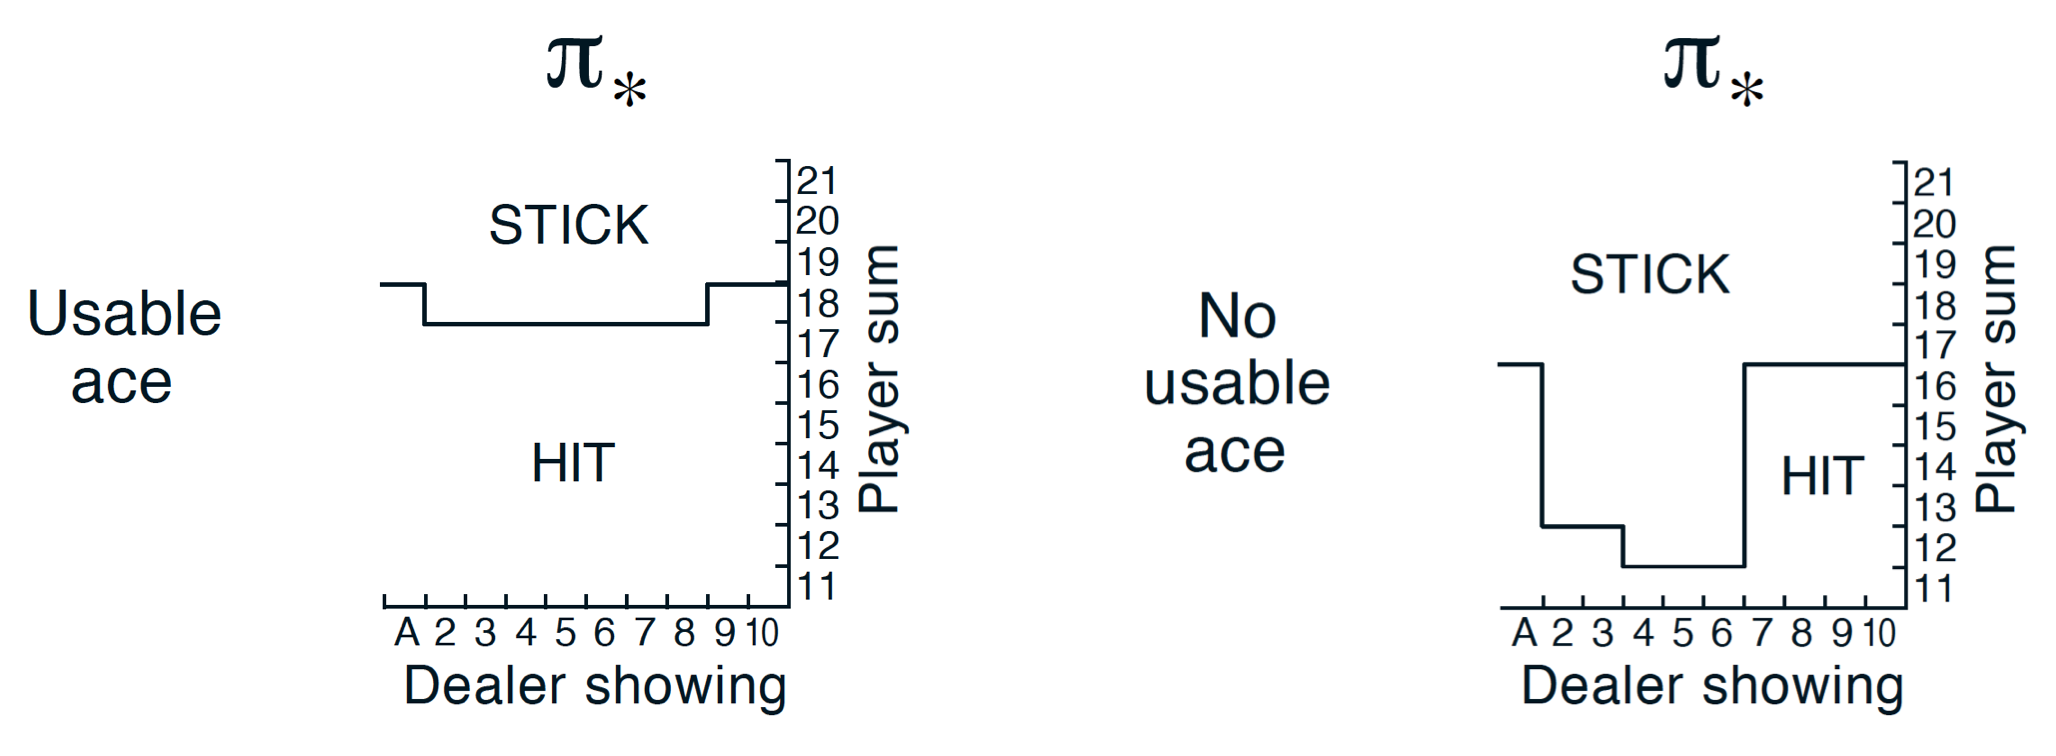

**Figura 2. Políticas óptimas.** Fuente: Sutton & Barto, 2018

A continuación os proporcionamos algunos escenarios de ejemplo extraídos de la figura:

| **Usable Ace** | **Dealer** | **Player_Sum** | **Action** |
|----------------|------------|----------------|------------|
| Yes            | 5          | 17             | HIT        |
| Yes            | 2          | 19             | STICK      |
| Yes            | 9          | 18             | HIT        |
| Yes            | 9          | 20             | STICK      |
| No             | 2          | 5              | HIT        |
| No             | 2          | 14             | STICK      |
| No             | 4          | 11             | HIT        |
| No             | 6          | 12             | STICK      |
| No             | 7          | 5              | HIT        |
| No             | 8          | 17             | STICK      |

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.1</strong> (1 punto)</div>

Implementar un agente que ejecute la política óptima definida un poco más arriba. En el caso de la suma de las cartas del jugador sólo es necesario implementar a partir de 12 (incluído), ya que el entorno hace que siempre pida otra carta si está por debajo de ese valor.

In [ ]:
# Inicializamos el entorno
env = bj1.BlackjackEnv()
obs = env.reset()
total_reward, done = 0, False

print("Obs inicial: Player = {}, Dealer = {}, Usable Ace = {} ".format(obs[0],obs[1],obs[2]))

switch_action = {
        0: "Stick",
        1: "Hit",
    }

In [ ]:
######################## SOLUCIÓN ###########################


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.2</strong> (0,5 puntos)</div>

Comprobación de resultados. Implementar una función que imprima la política por pantalla para comprobar que el agente implementado ejecuta correctamente la política óptima.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>NOTA:</strong> Tan sólo es necesario verificarlo para los estados de la Figura 2 (Player sum = 12-21, Dealer = 1-10, Usable/No usable ace).</div>

In [ ]:
def print_policy_opt(policy):

######################## SOLUCIÓN ###########################
        

In [ ]:
print_policy_opt(optimal_policy)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2.3</strong> (0,5 puntos)</div>

Utilizando el agente y el entorno del apartado anterior, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

Calculad el % de victorias, derrotas y empates y comentar las diferencias con respecto a la política del apartado 1.

In [ ]:
######################## SOLUCIÓ ###########################


In [ ]:
games = 100000
play_games(env, optimal_policy, games)

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>

</div>


## 3. Métodos de Montecarlo (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Montecarlo, en concreto estudiaremos el algoritmo 2 del módulo 5: *Control mediante métodos MC con exploraciones iniciales*. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.1</strong> (1 puntos)</div>

Implementar el Algoritmo 2 explicado en el módulo 5 "Métodos de Montecarlo", utilizando los siguientes parámetros:
    
- Número de episodios = 5.000.000
- Factor de descuento = 1

In [ ]:
######################## SOLUCIÓ ###########################


In [ ]:
######################## SOLUCIÓ ###########################


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.2</strong> (0,5 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada estado.

¿Se consigue llegar a la política óptima?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>NOTA:</strong> Para responder a la pregunta se recomienda implementar una función que compare la política obtenida para el conjunto de estados de la figura 2 con la política óptima e indique el número de acciones no óptimas (si las hay).</div>

In [ ]:
def print_policy_MC(policy):

######################## SOLUCIÓ ###########################


In [ ]:
print_policy_MC(mc_policy)

In [ ]:
def compara_mc(policy):

    ######################## SOLUCIÓ ###########################


In [ ]:
errors = compara_mc(mc_policy)
print("Número total de errores = {}".format(errors))

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>

</div>


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3.3</strong> (0,5 puntos)</div>

Utilizando el agente obtenido mediante el método de MC, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

Calculad el % de victorias, derrotas y empates y compararlos con los del apartado 2. ¿A qué se deben las posibles diferencias?

In [ ]:
######################## SOLUCIÓN ###########################


In [ ]:
games = 100000
_ = play_games_mc(env, mc_policy, games)

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>

</div>


## 4. Métodos de Diferencia Temporal (2 puntos)

El objetivo de este apartado es realizar una estimación de la política óptima mediante los métodos de Diferencia Temporal en el entorno Blackjack comentado anteriormente.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1</strong> (1,5 punto)</div>

Implementar el algoritmo *SARSA* explicado en el modulo 6 "Aprendizaje por Diferencia Temporal" y ejecutarlo utilizando los siguientes parámetros (1 punto):
    
- Número de episodios = 1.000.000
- *learning rate* = 0,001
- *discount factor* = 1
- *epsilon* = 1/(nº de episodio)
- *mínimo valor de epsilon* = 0,2 

Imprimir una gráfica con la evolución del mayor error TD de cada episodio (0,5 puntos).

In [ ]:
######################## SOLUCIÓN ###########################

from collections import defaultdict
import numpy as np

#Cargamos el entrono
env = bj1.BlackjackEnv()
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))
print("Reward range is {} ".format(env.reward_range))

In [ ]:
######################## SOLUCIÓN ###########################


In [ ]:
######################## SOLUCIÓN ###########################


In [ ]:
######################## SOLUCIÓN ###########################


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.2</strong> (0,25 puntos)</div>

Implementar una función que imprima por pantalla la política óptima encontrada para cada estado.

¿Se consigue llegar a la política óptima?

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>NOTA:</strong> Para responder a la pregunta se recomienda implementar una función que compare la política obtenida para el conjunto de estados de la figura 2 con la política óptima e indique el número de acciones no óptimas (si las hay).</div>

In [ ]:
def print_policy_SARSA(q):

######################## SOLUCIÓN ###########################


In [ ]:
print_policy_SARSA(Q_sarsa)

In [ ]:
def compara_sarsa(q):


In [ ]:
errors = compara_sarsa(Q_sarsa)
print("Número total de errores = {}".format(errors))

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>

</div>


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.3</strong> (0,25 puntos)</div>

Utilizando el agente obtenido mediante el método de SARSA, simular 100.000 partidas y calcular el retorno del agente (recompensa total acumulada).

¿Se aprecian grandes diferencias en los porcentajes obtenidos? ¿A qué es debido?

In [ ]:
######################## SOLUCIÓN ###########################


In [ ]:
_ = play_games_sarsa(env, Q_sarsa, num_games=100000)

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>

</div>


## 5. Comparativa de los algoritmos (2 puntos)

En este apartado realizaremos una comparativa entre los algoritmos.

Compararemos el comportamiento de los algoritmos al modificar los valores del factor de descuento, el *learning rate* (en el caso del método SARSA) y el numero de episodios.

Para cada ejercicio se deben mostrar y justificar los resultados.

<u>NOTA</u>: se recomienda realizar varias veces las simulaciones en cada ejercicio, ya que éstas son aleatorias, y comentar el resultado más frecuente, o una media de estos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.1-Influencia del número de episodios</strong> (1 punto)</div> 

Realizar un estudio cambiando el número de episodios en cada uno de los 2 algoritmos:
- Entrenar cada algoritmo varias veces con 100.000, 1.000.0000 y 5.000.000 de episodios y promediar los resultados
- Indicar cómo influye el número de episodios en la convergencia de cada algoritmo, calculando el número de estados en que la política difiere de la óptima así como la media del retorno obtenido al jugar 100.000 partidas después de cada entrenamiento.

In [ ]:
######################## SOLUCIÓN ###########################


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>

    
Algoritmo MC:  
    
Algoritmo SARSA: 

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.2-Influencia del factor de descuento</strong> (0,5 puntos)</div> 

Ejecutar los 2 algoritmos con *discount factor*=0.1 y el resto de parámetros iguales que en los ejercicios 3 y 4. Describir los cambios en la política óptima, comparando el resultado obtenido con el resultado de los ejercicios 3 y 4 (*discount factor*=1).


In [ ]:
######################## SOLUCIÓN ###########################


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br>
    
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 5.3-Influencia del learning rate</strong> (0,5 puntos)</div> 

Ejecutar el algoritmo de *SARSA* con los siguientes valores de *learning rate*: 0.001, 0.01, 0.1 y 0.9. Analizar las diferencias con los resultados obtenidos en la pregunta 4 en término de número de errores respecto a la política óptima y de recompensa acumulada cada 100.000 episodios jugados.

In [ ]:
######################## SOLUCIÓN ###########################


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>CONCLUSIONES:</strong>
<br><br>
</div>